In [0]:
# Imports 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

movies = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
ratings = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

movies_by_genres = movies["genres"].str.get_dummies('|').sum().sort_values(ascending=False)

# Taking mean from ratings
mean_ratings_movies = ratings.groupby("movieId")["rating"].mean()
# Adding rating to the movies table
movies_with_mean = movies.join(mean_ratings_movies, on="movieId")


## Challenge 1

Make a barplot showing th enumber of movies by genre. Obs: Rotate the thicks

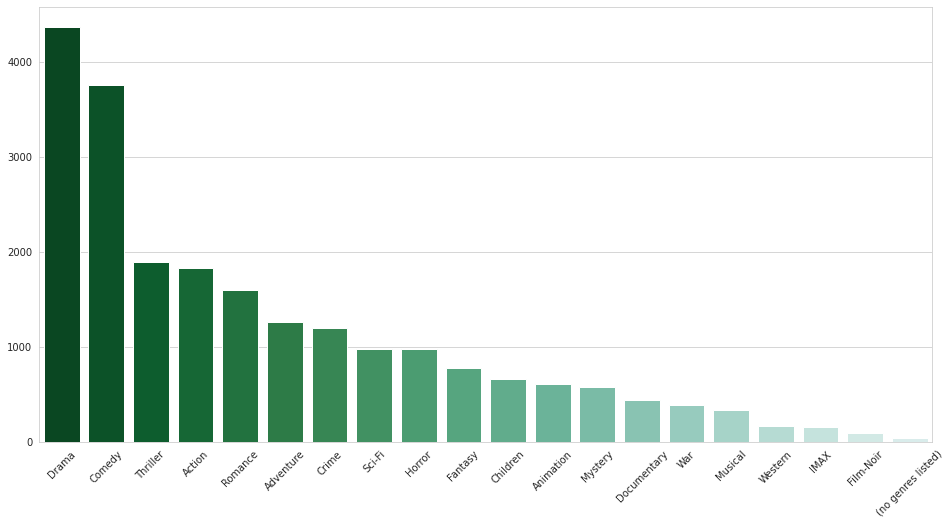

In [7]:
sns.set_style("whitegrid")

# counting and separating the genres from movies into classes
movies_by_genres = movies["genres"].str.get_dummies('|').sum().sort_values(ascending=False)

plt.figure(figsize=(16,8))
grafic = sns.barplot(x=movies_by_genres.index,
            y=movies_by_genres.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(movies_by_genres) + 4))
for item in grafic.get_xticklabels():
    item.set_rotation(45)
plt.show()


## Challenge 2

Find some movies with close averages( `.mean()` ) but diferently distribuction, use `plot_movie(n)` for ploting.


In [0]:
def plot_movie(n):
  movie_rating = ratings.query(f"movieId=={n}")["rating"]
  movie_rating.plot(kind='hist')
  plt.show()
  print('\n')
  movie_rating.plot.box()
  plt.show()
  return movie_rating.describe()

For check the mean of the distribution, I will check the median of the ratings

In [17]:
# getting the medians from ratings
median_ratings = ratings.groupby("movieId")['rating'].median()

# Join into 'median_ratings' and 'movies_with_mean'. I changed the column with the same name with suffixes
ratings_median_mean = movies_with_mean.join(median_ratings, on="movieId", lsuffix='_left', rsuffix='_right')

# rename the columns for 'median' and 'mean'
ratings_median_mean.rename(columns={'rating_left' : 'mean', 'rating_right' : 'median'}, inplace=True)

# get the number of rating per movie
num_rating  = ratings.groupby("movieId").size() 
num_rating

# Setting name series
num_rating.name = "num_ratings" 

# join median_mean with num_ratings
ratings_median_mean = ratings_median_mean.join(num_rating, on='movieId')

ratings_median_mean = ratings_median_mean.sort_values('num_ratings', ascending=False)

# removing all 'NaN' median, mean or num_ratings
ratings_median_mean = ratings_median_mean.dropna()

ratings_median_mean


,movieId,title,genres,mean,median,num_ratings
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,4.0,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,4.5,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,4.5,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,4.0,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,4.5,278.0
...,...,...,...,...,...,...
3057,4093,Cop (1988),Thriller,1.500000,1.5,1.0
3053,4089,Born in East L.A. (1987),Comedy,2.000000,2.0,1.0
6704,58351,City of Men (Cidade dos Homens) (2007),Drama,4.000000,4.0,1.0
3049,4083,Best Seller (1987),Thriller,4.000000,4.0,1.0


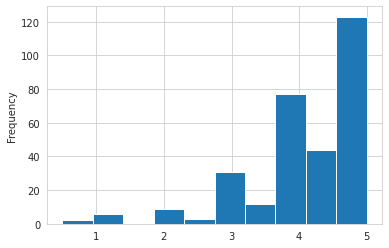

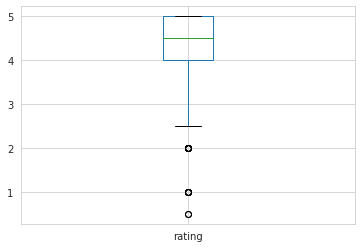

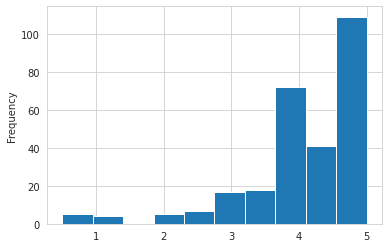

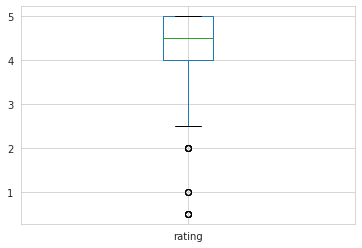

count    278.000000
mean       4.192446
std        0.975243
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [23]:
## movies: 
# Pulp fiction: 296
# Matrix: 2571

plot_movie(296)
plot_movie(2571)

## Challenge 3

Create the boxplot with top 10 most rating ( in number of votes ) . 


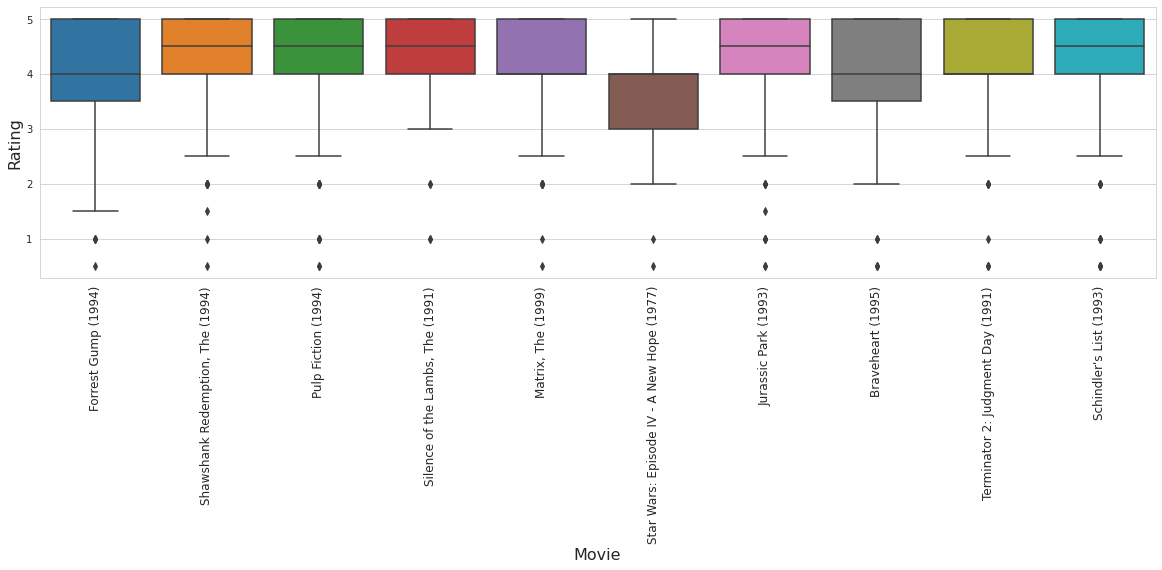

In [25]:
top10_movies = ratings_median_mean.sort_values(by='num_ratings',ascending=False).head(10)

# Setting graphic size
plt.figure(figsize=(20,5))

##  Setting boxplot

ax = sns.boxplot(x='movieId', y='rating', data=ratings.query(f"movieId in {top10_movies['movieId'].to_list()}"))

ax.set_xticklabels(top10_movies['title'].to_list(), fontsize=12)
ax.set_xlabel("Movie", fontsize=16)
ax.set_ylabel("Rating", fontsize=16)
plt.xticks(rotation=90)

plt.show()

## Challenge 4

Improve the Graph display

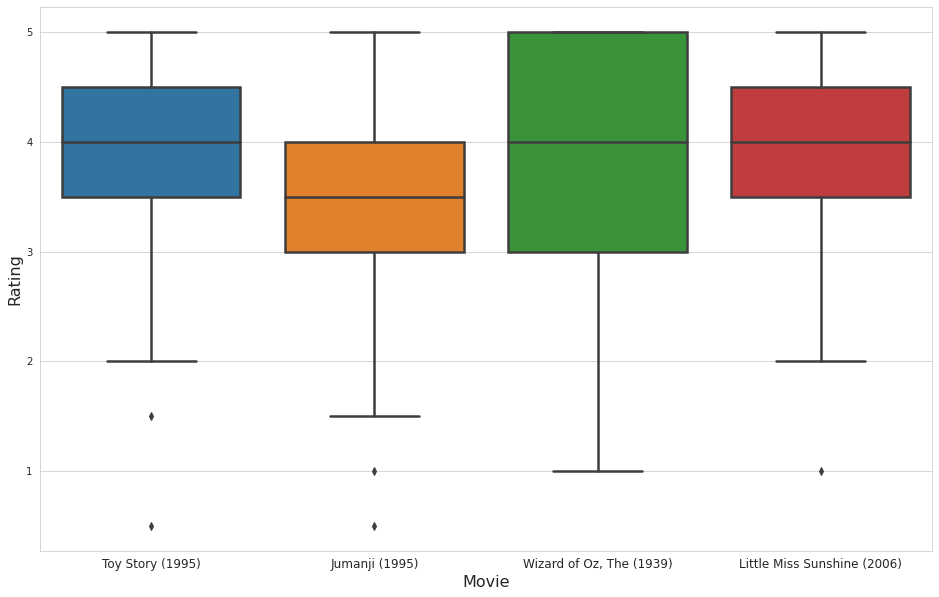

In [26]:
plt.figure(figsize=(16,10))

ax = sns.boxplot(data = ratings.query("movieId in [1,2,919,46578]"), x ="movieId", y="rating", linewidth=2.5)

# getting the graphic ticks name 
ax.set_xticklabels(movies.query("movieId in [1,2,919,46578]")['title'], fontsize=12)
ax.set_xlabel("Movie", fontsize=16)
ax.set_ylabel("Rating", fontsize=16)

plt.show()


## Challenge 5

Calculate the mean, median and mode from movies. Explore movies with ratings close to 0.5, 3 and 5.

In [0]:
def movies_explorer(movie_id):
    movie = movies.query(f'movieId == {movie_id}')
    rating = ratings.query(f'movieId == {movie_id}')['rating']
    
    print(f'Movie: {movie.iloc[0, 1]}')
    print()
    
    print(f'Mode: {rating.mode().values}')    
    print(f'Mean: {rating.mean()}')
    print(f'Median: {rating.median()}')
    print('------------')

In [30]:
movies_explorer(8387)
movies_explorer(89386)
movies_explorer(3774)

Movie: Police Academy: Mission to Moscow (1994)

Mode: [0.5]
Mean: 0.8
Median: 0.5
------------
Movie: Pearl Jam Twenty (2011)

Mode: [0.5]
Mean: 0.5
Median: 0.5
------------
Movie: House Party 2 (1991)

Mode: [0.5 1. ]
Mean: 0.75
Median: 0.75
------------


In [31]:
movies_explorer(2041)
movies_explorer(7541)
movies_explorer(160080)

Movie: Condorman (1981)

Mode: [4.]
Mean: 3.3333333333333335
Median: 4.0
------------
Movie: 100 Girls (2000)

Mode: [3.5]
Mean: 3.25
Median: 3.5
------------
Movie: Ghostbusters (2016)

Mode: [3.  3.5]
Mean: 3.125
Median: 3.25
------------


## Challenge 6

Plot the boxplot and histogram side by side


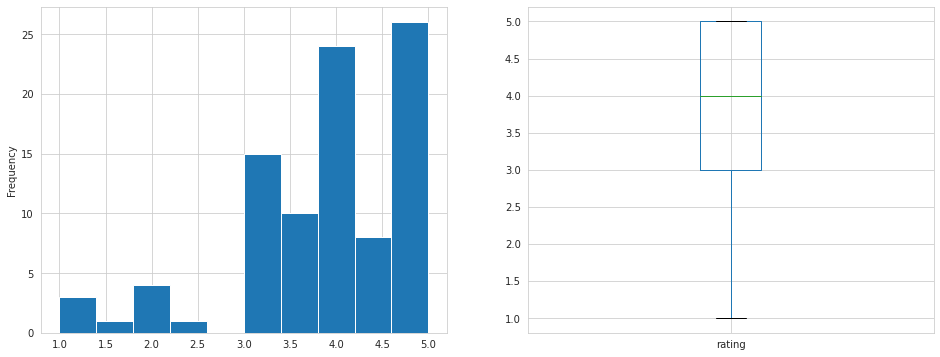

In [32]:
def plot_movie_on_side(n):
  # getting the movie from ratings
  movie = ratings.query(f'movieId == {n}')['rating']

  ## === WHERE THE MAGIC HAPPENS ===== 
  # assign two subpots to the plot
  f, axes = plt.subplots(1, 2, figsize=(16, 6))

  # Setting both Graphics in same plot, but differently indexes
  movie.plot(kind='hist', ax=axes[0])
  movie.plot(kind='box', ax=axes[1])

  plt.show()

plot_movie_on_side(919)

## Challenge 7

Create a Graphic with mean movie ratings per year.

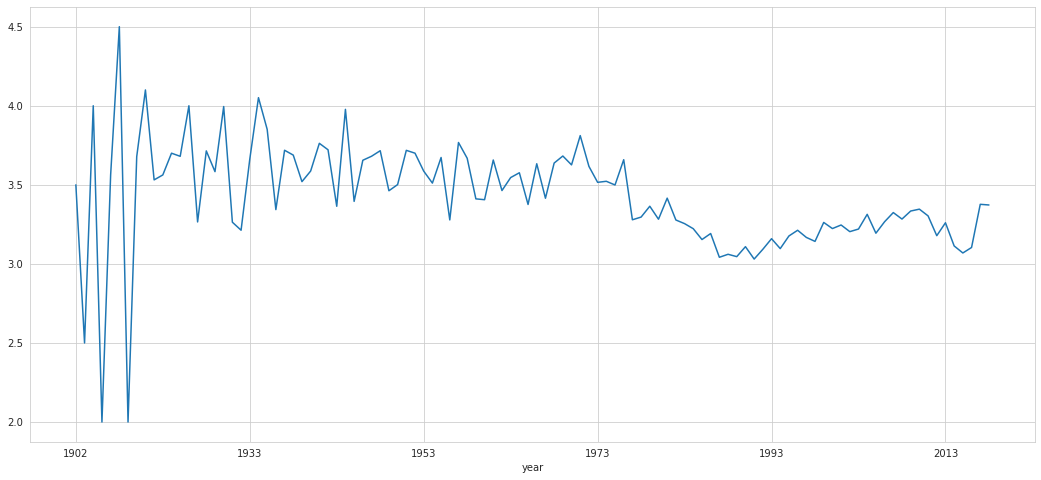

In [33]:
movies_with_year = ratings_median_mean

# removing the year from title with regex
movies_with_year['year'] = ratings_median_mean['title'].str.extract("\((\d{4})\)")

mean_per_year = movies_with_year.groupby('year')['mean'].mean()

plt.show();
plt.figure(figsize=(18, 8))
mean_per_year.plot()